# **Classification using Decision Tree Model**

# Dataset: Seven different types of dry beans (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


## Dataset Selection and Loading

### Dry Bean Dataset Data Set

[Link to UCI repository](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)

**Data Set Information**

Seven different types of dry beans (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

**Attribute Information:**

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



In [ ]:
# Load Libraries

import pandas as pd
import numpy as np
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import graphviz

In [ ]:
# Download the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
filename = "DryBeanDataset.zip"
urllib.request.urlretrieve(url, filename)

# Extract the dataset from the zip file
import zipfile
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()



In [ ]:
# Load the dataset into a pandas dataframe
filename = "/content/DryBeanDataset/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(filename)

# Print the first 5 rows of the dataset
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Exploratory Data Analysis and Visualization

In [ ]:
# Print the number of rows and columns in the dataset
print("Dataset Shape:", df.shape)

# Analysis of class category for unique values
df['Class'].unique()

Dataset Shape: (13611, 17)


array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

There is 13610 rows and total 16 features.

Dataset is classified wit 7 unique target classes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# check for missing values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There is no missing value in this dataset therefore no further processing require to remove or imputation those.

In [ ]:
# Check for dupliate rows
df.duplicated(subset=None, keep='first').sum()

68

68 rows were found as duplicates and all of those from 'HOROZ'

Removing all duplicate so that it will not affect training or validation.

In [ ]:
df = df.drop_duplicates(keep='first')
df.shape

(13543, 17)

In [ ]:
# Get Data Summary
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,200926.570000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1716.459720,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,651.201993,738.860153
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,401.456981,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.247636,2.430306
Eccentricity,13543.0,0.750315,0.091858,0.218951,0.715144,0.763997,0.809671,0.895574,0.911423
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,203406.050000,263261.000000
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,505.793910,569.374358
Extent,13543.0,0.749829,0.048939,0.555315,0.718735,0.759903,0.786849,0.831377,0.866195
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.993305,0.994677


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


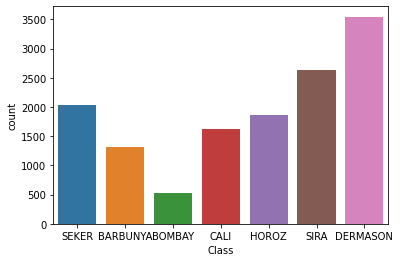

In [ ]:
# Count and distribution of all beans categories
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)

Above bar graph shows that data for categories are inbalance and we need to consider this while future opertions

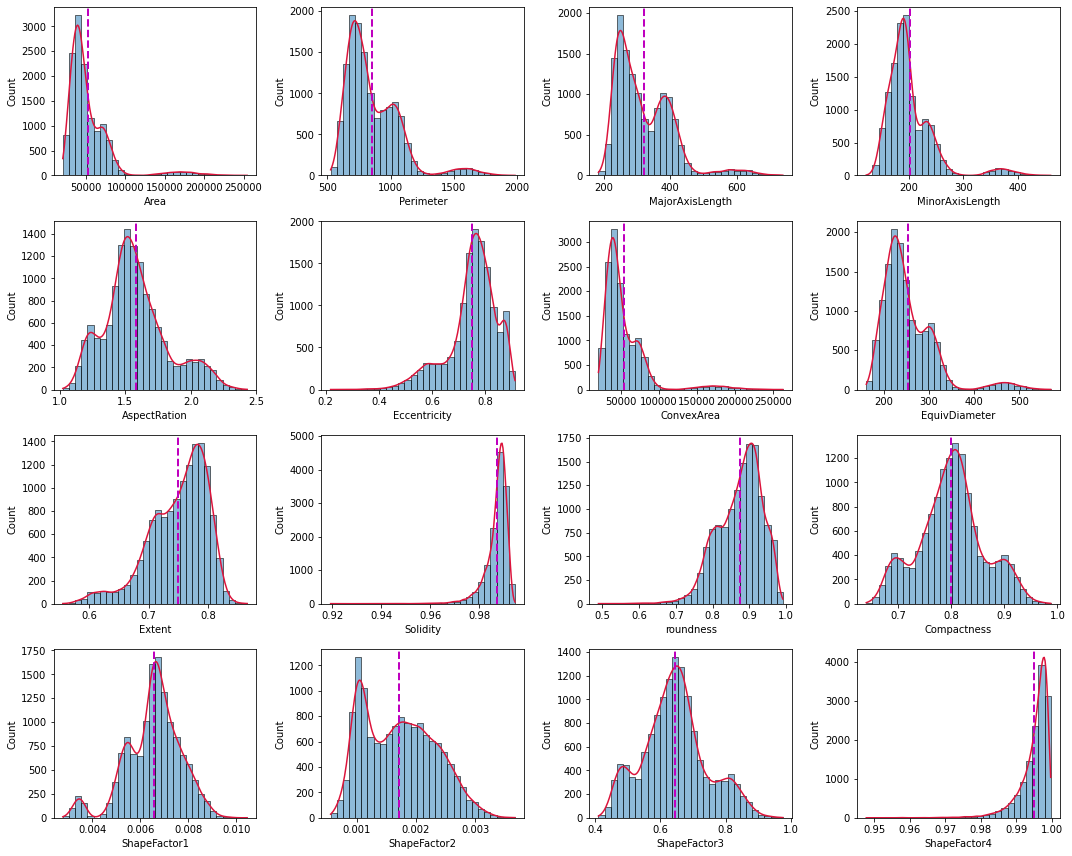

In [ ]:
# Inference on feature data distribution

colms = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(colms, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

Most distributions have long tails and are bi-model or tri-model. This means that some classes are distinct from others.

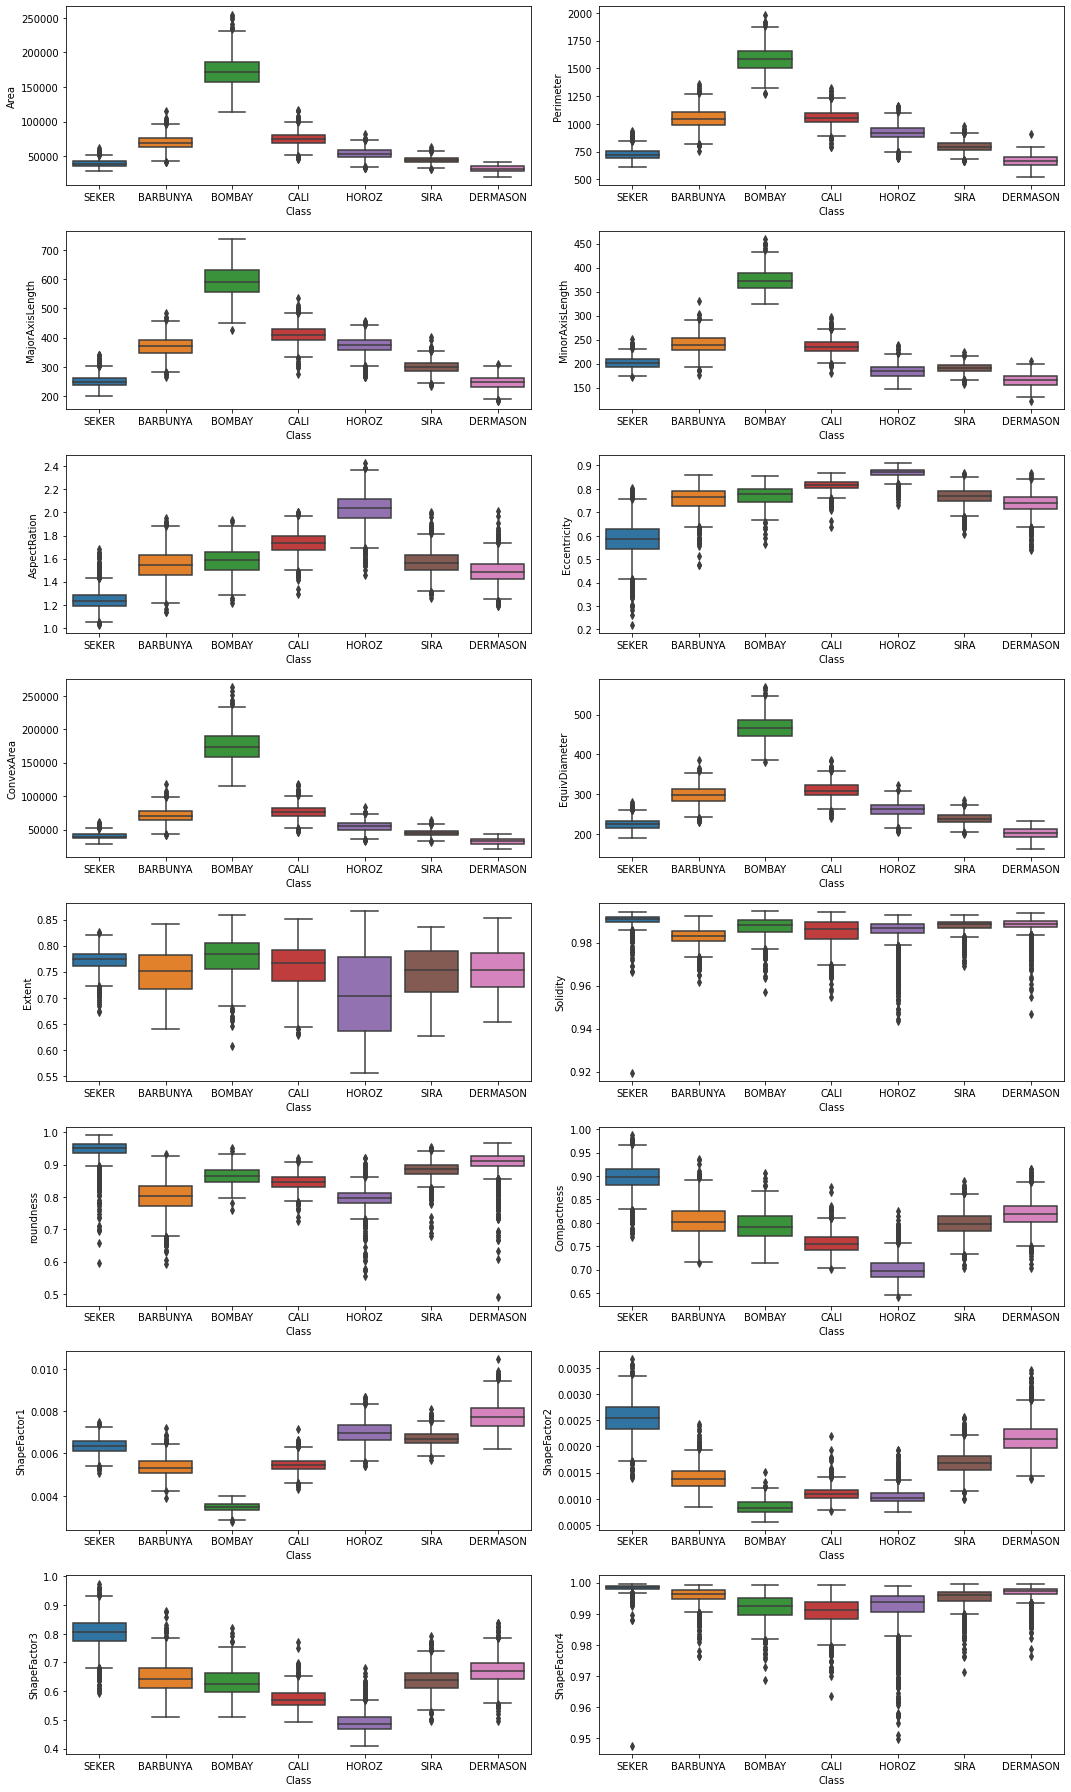

In [ ]:
# Boxplot analysis
# Looking into how numerical measurements are associated with class categories

fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(colms, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

Here we can visualize Bombay and Horoz classes having distint from others

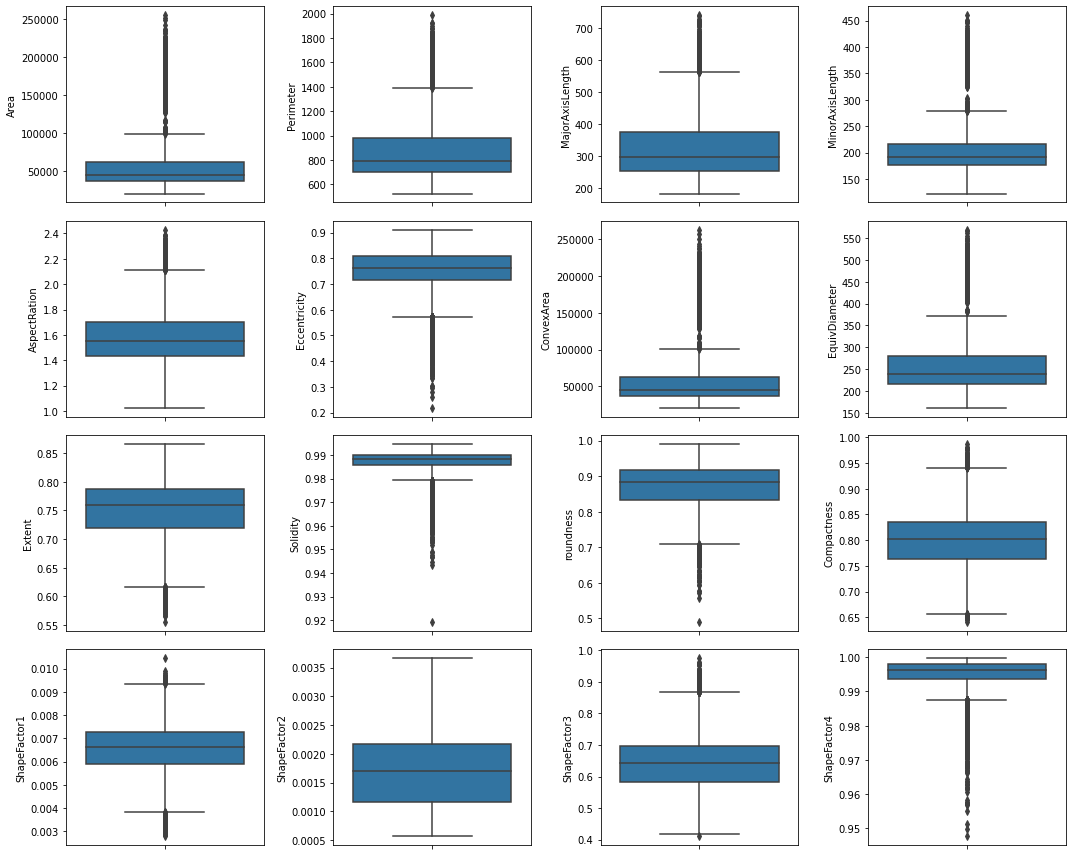

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(colms, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

In [ ]:
# Remove outliers

q1 = df[colms].quantile(0.25)
q3 = df[colms].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers in each numeric column
outliers = df[colms][(df[colms] < lower_bound) | (df[colms] > upper_bound)]

# Remove the outliers from the dataframe
df_clean = df.drop(outliers.index)

df_clean



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class


As you can see when I remove outliers for each parameters all record got removed. This mean different attribute contribute differently and without having deeper understanding of each attribute we can't remove any values. Further data for categories were not equally distributed therefore, those may contribute to outliers as well. Hence, decided to keep dataset without removing any outliers.

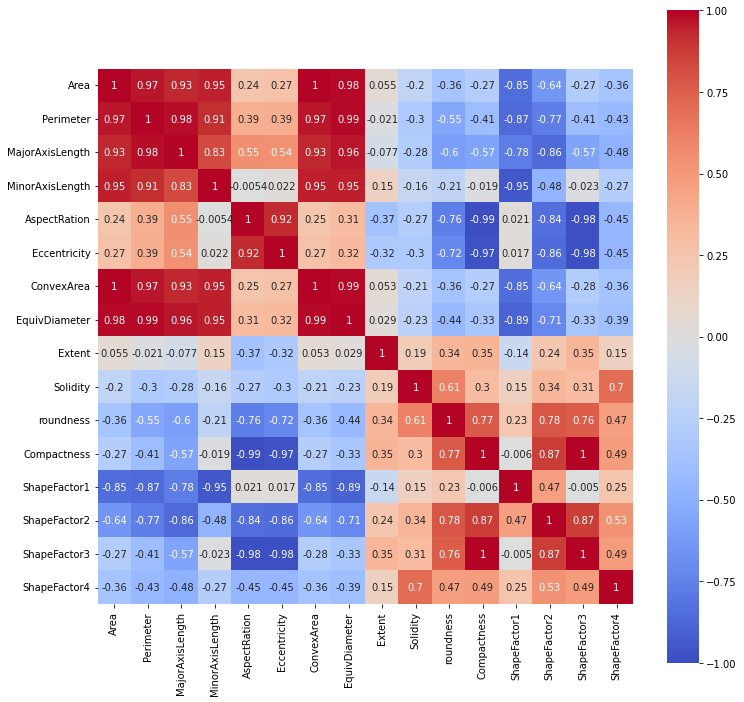

In [ ]:
# Pearson Linear correlation

plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)
plt.show()

There are lots of highly correlated features and to examine this multicollinearity more, we will look at the pairwise scatter plots.

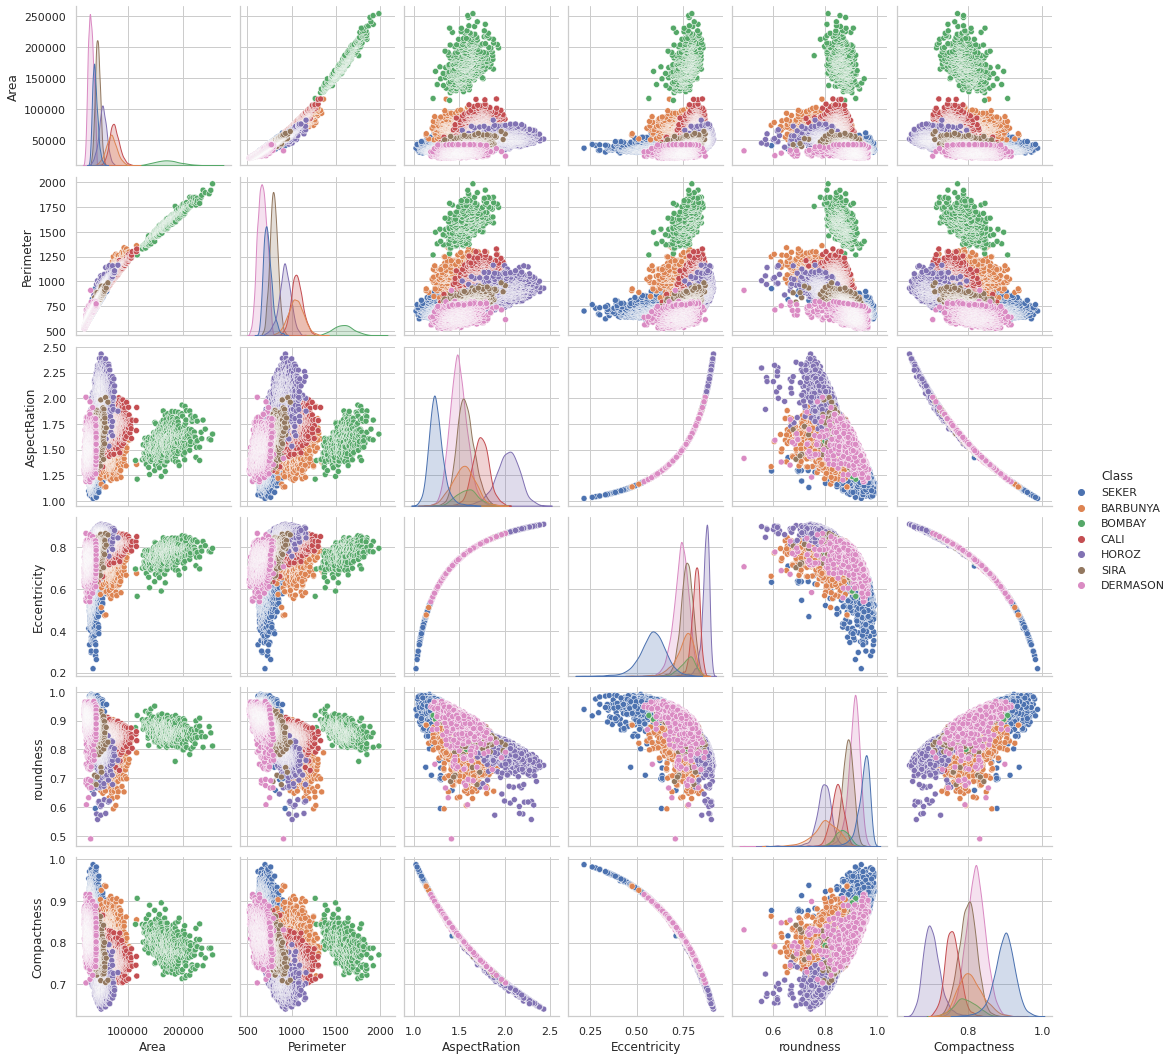

In [ ]:
# Visualisation for Scatterplot including Class labels
# If you run this for all attributes, its runs for long therefore selcting few important attributes based on correlation
scatter_df = df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
sns.set_theme(style="whitegrid")
sns.pairplot(scatter_df, hue="Class")
plt.show()

## Implementation and Evaluation of the Decision Tree Model and Finding Optimal hyperparameters

This section include, Comparison of the Accuracies of the Decision Tree Model for Different Tree Depth using Cross-Validation

In [ ]:
# Split the data into features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into train, validation, and test sets using stratify
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=0, stratify = y_valtest )



In [ ]:
# Define a range of tree depths to evaluate
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


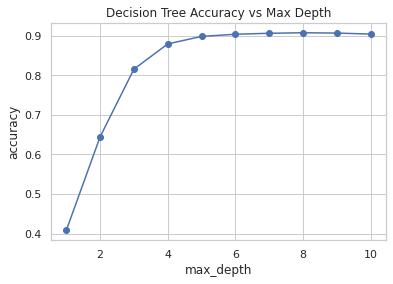

In [ ]:
# Evaluate the decision tree model for each tree depth using cross-validation on the validation set
cv_scores = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

# Plot the performance of the model for each value of max_depth
import matplotlib.pyplot as plt
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.show()

In [ ]:
# Find the optimal value of max_depth that maximizes the accuracy on the validation set
optimal_max_depth = max_depths[cv_scores.index(max(cv_scores))]
print('Optimal max_depth on train set:', optimal_max_depth)



Optimal max_depth on train set: 8


## Selection of the Optimal Tree Depth that Gives the Best Accuracy

In [ ]:
# Train the decision tree model on the combined training and validation sets using the selected max_depth
clf = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=0)
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])
clf.fit(X_trainval, y_trainval)


# Evaluate the final model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

Accuracy: 91.39%
Precision: 92.96%
Recall: 92.32%
F1-score:92.61%


In [ ]:

# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')

# Display the decision tree
graph.view()

'decision_tree.pdf'